In [5]:
# import the necessary packages

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [6]:
# load the dataset with the extracted features

df = pd.read_csv('../data/extracted_features.csv')

df = df.drop(columns=['date', 'state', 'city_or_county'])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255017 entries, 0 to 255016
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   latitude                218250 non-null  float64
 1   longitude               218250 non-null  float64
 2   congressional_district  214209 non-null  float64
 3   min_age_participants    149226 non-null  float64
 4   avg_age_participants    149222 non-null  float64
 5   max_age_participants    149223 non-null  float64
 6   n_participants_child    237232 non-null  float64
 7   n_participants_teen     237232 non-null  float64
 8   n_participants_adult    237232 non-null  float64
 9   n_males                 243052 non-null  float64
 10  n_females               243052 non-null  float64
 11  n_killed                255017 non-null  int64  
 12  n_injured               255017 non-null  int64  
 13  n_arrested              255017 non-null  int64  
 14  n_unharmed          

,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,...,kil_to_p,man_to_p,fem_to_p,arr_to_p,unh_to_p,inj_to_p,n_minors,teen_to_m,teen_to_f,par_to_tot
count,218250.000000,218250.000000,214209.000000,149226.000000,149222.000000,149223.000000,237232.000000,237232.000000,237232.000000,243052.000000,...,195186.000000,183221.000000,183221.000000,195186.000000,195186.000000,195186.000000,237232.000000,255017.000000,255017.000000,255015.000000
mean,37.575690,-89.548402,8.034513,28.356902,30.002620,31.788484,0.018025,0.103679,1.146645,1.143517,...,0.183361,0.864441,0.103873,0.284978,0.184336,0.331822,0.121704,0.056365,0.087744,0.010176
std,5.167795,14.404105,8.502812,12.480168,12.444171,13.687124,0.160655,0.407470,1.117590,1.064991,...,0.339989,0.266598,0.243349,0.402141,0.327193,0.413374,0.439905,0.231887,0.362968,0.023018
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.836800,-94.639150,2.000000,20.000000,21.000000,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001427
50%,38.628900,-86.665200,5.000000,25.000000,27.000000,28.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004808
75%,41.466500,-80.085200,10.000000,34.000000,36.000000,38.000000,0.000000,0.000000,2.000000,2.000000,...,0.250000,1.000000,0.000000,0.500000,0.333333,0.666667,0.000000,0.000000,0.000000,0.010582
max,71.336800,97.433100,53.000000,101.000000,101.000000,101.000000,7.000000,27.000000,33.000000,29.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,6.000000,9.000000,1.000000


# Clustering Preprocessing

Before we can cluster the data, we need to preprocess it. We will use two different scalers to compare the results. The first one is the StandardScaler, which scales the data to have a mean of 0 and a standard deviation of 1. The second one is the MinMaxScaler, which scales the data to be in the range of 0 and 1. 

In [7]:
# prepare the scalers for comparison

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

# scale the data
z_scaled = scaler.fit_transform(df.dropna())
mm_scaled = minmax.fit_transform(df.dropna())

# Choosing the Number of Clusters

We will use the elbow method to determine the optimal number of clusters. The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. The optimal number of clusters is the value after which the distortion/inertia start decreasing in a linear fashion.

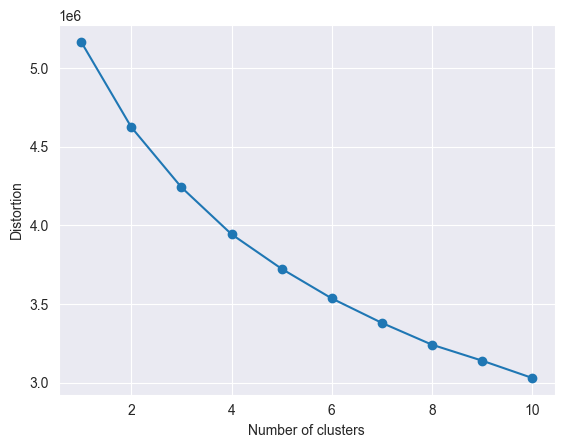

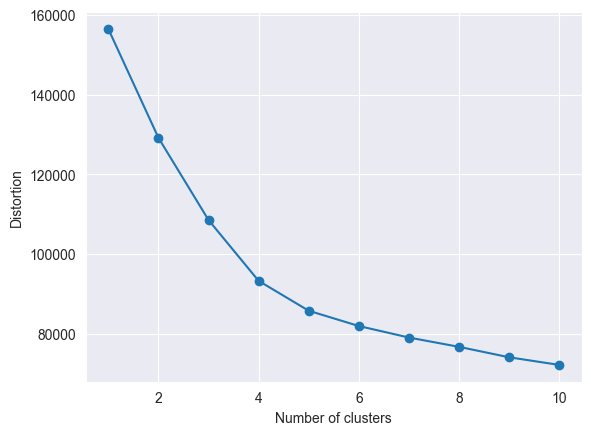

In [8]:
# determine the optimal number of clusters

from sklearn.cluster import KMeans

def elbow_method(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    return distortions


for data in [z_scaled, mm_scaled]:
    distortions = elbow_method(data)
    plt.plot(range(1, len(distortions) + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()


We also try to apply other methods to determine the optimal number of cluster, such as the silhouette score and the Calinski-Harabasz index.

In [9]:
from utils import calculate_silhouette_scores, calculate_ch_index

**Note** it takes a long time to run the following code, so don't run it unless you really need to.

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "C:\Users\Hp\Desktop\DataMining\env\lib\site-packages\numpy\core\multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "C:\Users\Hp\Desktop\DataMining\env\lib\site-packages\numpy\core\multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
